In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2
import os
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import datasets
import pandas as pd

In [12]:
train_dir = "./dataset/cifar10/train"
test_dir = "./dataset/cifar10/test"
train_list = os.listdir(train_dir)
test_list = os.listdir(test_dir)
label = train_list

In [13]:
X_train = []
Y_train = []
X_test = []
Y_test= []
for i in train_list:
    img_list = os.listdir(train_dir + "/" + i)
    for j in img_list:
        img = cv2.imread(train_dir + "/" + i + '/' + j)
        X_train.append(img)

X_train = np.array(X_train)/255
print(np.shape(X_train))

for i in test_list:
    img_list = os.listdir(test_dir + "/" + i)
    for j in img_list:
        img = cv2.imread(test_dir + '/' + i + '/' + j)
        X_test.append(img)
        
X_test = np.array(X_test)/255
print(np.shape(X_test))


for i in range(5):
    for j in range(5000):
        Y_train.append(i)
Y_train = np.array(Y_train)
Y_train = to_categorical(Y_train, num_classes = 5)



for i in range(5):
    for j in range(1000):
        Y_test.append(i)
Y_test = np.array(Y_test)
Y_test = to_categorical(Y_test, num_classes = 5)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2022)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape, Y_test.shape)

(25000, 32, 32, 3)
(5000, 32, 32, 3)
(22500, 32, 32, 3) (22500, 5) (2500, 32, 32, 3) (2500, 5) (5000, 32, 32, 3) (5000, 5)


In [38]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),input_shape = (32,32,3),
activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))


model.add(Conv2D(64,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))


model.add(Conv2D(128,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 8, 8, 64)          0         
                                                                 
 conv2d_38 (Conv2D)          (None, 8, 8, 128)        

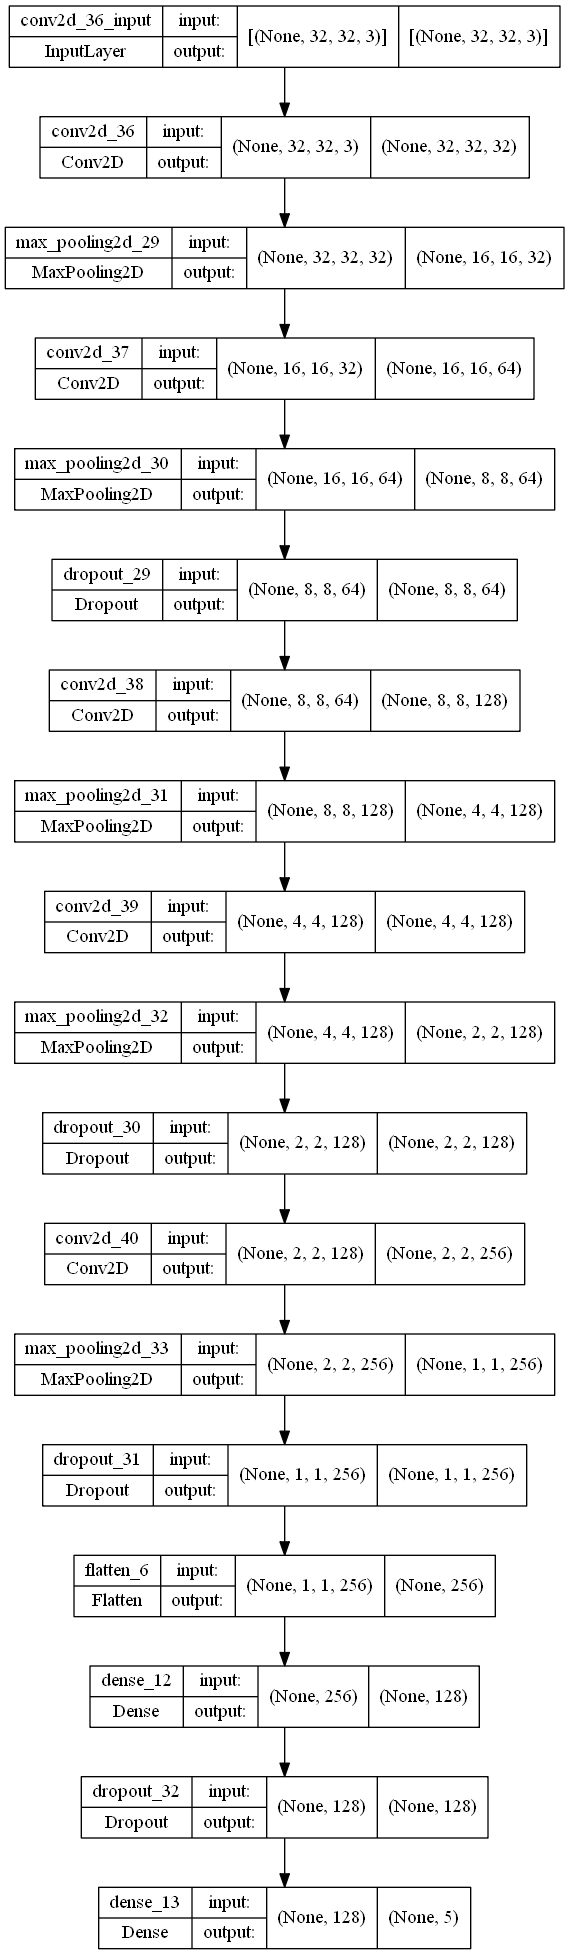

In [39]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.01),
             metrics=['accuracy', tf.keras.metrics.AUC()]
             )
             
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=15, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)
model.summary()
plot_model(model, show_shapes=True)

In [40]:
created_time = int(time.time())
model_dir = f'model/{created_time}'
os.makedirs(f'model/{created_time}')

In [41]:
history = model.fit(X_train, Y_train,validation_data = [X_val, Y_val],epochs = 250, batch_size = 256,callbacks=[es,tf.keras.callbacks.CSVLogger(f'{model_dir}/log.csv')])

Epoch 1/250
88/88 [==============================] - 23s 249ms/step - loss: 1.6096 - accuracy: 0.2089 - auc_6: 0.5147 - val_loss: 1.6102 - val_accuracy: 0.1944 - val_auc_6: 0.4930
Epoch 2/250
88/88 [==============================] - 23s 265ms/step - loss: 1.6096 - accuracy: 0.1992 - auc_6: 0.4985 - val_loss: 1.6098 - val_accuracy: 0.1940 - val_auc_6: 0.4945
Epoch 3/250
88/88 [==============================] - 24s 270ms/step - loss: 1.6096 - accuracy: 0.2026 - auc_6: 0.4990 - val_loss: 1.6093 - val_accuracy: 0.2008 - val_auc_6: 0.5053
Epoch 4/250
88/88 [==============================] - 25s 287ms/step - loss: 1.6097 - accuracy: 0.1935 - auc_6: 0.4956 - val_loss: 1.6095 - val_accuracy: 0.1940 - val_auc_6: 0.4967
Epoch 5/250
88/88 [==============================] - 26s 295ms/step - loss: 1.6097 - accuracy: 0.1990 - auc_6: 0.4965 - val_loss: 1.6093 - val_accuracy: 0.2076 - val_auc_6: 0.5067
Epoch 6/250
88/88 [==============================] - 26s 293ms/step - loss: 1.6098 - accuracy: 0.193

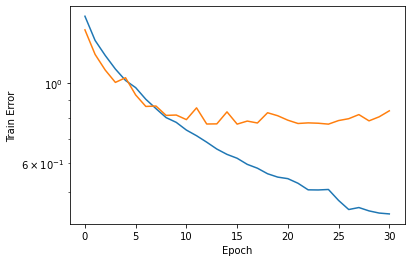

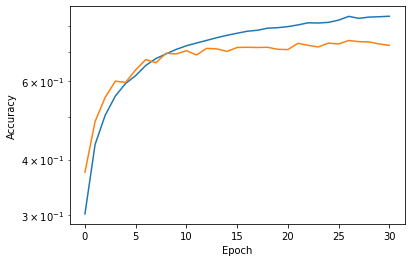

In [35]:
plt.figure()
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.savefig(f"{model_dir}/train_error.png")
plt.figure()
pd.Series(history.history['accuracy']).plot(logy=True)
pd.Series(history.history['val_accuracy']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig(f"{model_dir}/accuracy.png")
plt.show()

In [36]:
test_result = model.evaluate(X_test,Y_test)

157/157 [==============================] - 2s 12ms/step - loss: 0.7925 - accuracy: 0.7088 - auc_5: 0.9237


In [37]:
model.save(f"{model_dir}/model_[{test_result[1]:.2f}].h5")